In [1]:
using Plots;
gr();#plotlyjs();
using Revise
using FUSE
FUSE.logging(Logging.Info; actors=Logging.Debug);
#dd=FUSE.warmup();

[ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]


WebIO._IJuliaInit()

In [6]:
IMAS.dd()

dd
├─ balance_of_plant
│  ├─ Q_plant ➡ Function
│  ├─ power_electric_net ➡ Function [W]
│  ├─ power_electric_plant_operation
│  │  └─ total_power ➡ Function [W]
│  └─ thermal_cycle
│     ├─ power_electric_generated ➡ Function [W]
│     └─ total_useful_heat_power ➡ Function [W]
├─ build
│  └─ tf
│     └─ ripple ➡ Function
├─ core_profiles
│  └─ vacuum_toroidal_field
│     ├─ b0 ➡ Function [T]
│     └─ r0 ➡ Function [m]
├─ core_sources
│  └─ vacuum_toroidal_field
│     ├─ b0 ➡ Function [T]
│     └─ r0 ➡ Function [m]
├─ costing
│  ├─ cost_decommissioning
│  │  └─ cost ➡ Function [$M]
│  ├─ cost_direct_capital
│  │  └─ cost ➡ Function [$M]
│  └─ cost_operations
│     └─ yearly_cost ➡ Function [$M/year]
└─ summary
   ├─ fusion
   │  └─ power
   │     └─ value ➡ Function [W]
   ├─ global_quantities
   │  ├─ b0
   │  │  └─ value ➡ Function [T]
   │  ├─ beta_pol_mhd
   │  │  └─ value ➡ Function
   │  ├─ beta_tor
   │  │  └─ value ➡ Function
   │  ├─ beta_tor_mhd
   │  │  └─ value ➡ Function
  

In [ ]:
ini, act = FUSE.case_parameters(:FPP; version=:v1_demount, init_from=:scalars)
ini.tf.shape = :double_ellipse
dd = FUSE.init(ini,act);

In [1]:
FUSE.ExtractFunctionsLibrary

LoadError: UndefVarError: FUSE not defined

In [31]:
path= "/Users/meneghini/Coding/julia/FUSE/examples/workflows/optimization_runs"
dirs = filter(isdir,sort(readdir(path; join=true)))
println(length(dirs))
dirs = filter(x->!isfile(joinpath(x,"error.txt")) && isfile(joinpath(x,"dd.h5")),dirs)[1:10:end]
println(length(dirs))
outputs=FUSE.load(dirs; filter_invalid=true);

809
73


LoadError: MethodError: no method matching (::FUSE.var"#838#839")(::IMASDD.dd{Float64})

Some of the types have been truncated in the stacktrace for improved reading. To emit complete information
in the stack trace, evaluate `TruncatedStacktraces.VERBOSE[] = true` and re-run the code.


In [29]:
outputs

0×15 DataFrame

In [8]:
IMAS.digest(dd.summary;reverse=true, join_with="__")

Dict{Symbol, Any} with 20 entries:
  :tau_energy_98         => 1.31046 [s]
  :current_non_inductive => 6.43391e6 [A]
  :beta_tor_thermal_norm => 3.40639
  :current_ohm           => 4.07416e6 [A]
  :beta_tor              => 0.0550936
  :tau_energy            => 1.52354 [s]
  :beta_tor_norm_mhd     => 4.4337
  :time                  => 0.0 [s]
  :beta_tor_mhd          => 0.0717155
  :h_98                  => 1.1626
  :n_e                   => 1.17361e20 [m^-3]
  :beta_pol_mhd          => 1.95011
  :b0                    => 4.71317 [T]
  :rho_tor_norm          => 0.95
  :t_e                   => 2832.67 [eV]
  :zeff                  => 2.0
  :current_bootstrap     => 6.37731e6 [A]
  :power                 => 1.47124e8 [W]
  :ip                    => 1.05069e7 [A]
  :energy_thermal        => 2.54652e8 [J]

In [34]:
plot(dd.equilibrium; cx=true)
plot!(dd.build)
getfield(ini.tf,:shape)

ini.tf.shape
- options: Dict{Any, SimulationParameters.SwitchOption}(:princeton_D_exact => SimulationParameters.SwitchOption(:princeton_D_exact, "princeton_D_exact"), :princeton_D => SimulationParameters.SwitchOption(:princeton_D, "princeton_D"), :spline => SimulationParameters.SwitchOption(:spline, "spline"), :double_ellipse => SimulationParameters.SwitchOption(:double_ellipse, "double_ellipse"), :miller => SimulationParameters.SwitchOption(:miller, "miller"), :rectangle => SimulationParameters.SwitchOption(:rectangle, "rectangle"), :triple_arc => SimulationParameters.SwitchOption(:triple_arc, "triple_arc"), :princeton_D_scaled => SimulationParameters.SwitchOption(:princeton_D_scaled, "princeton_D_scaled"))
- units: -
- description: Shape of the TF coils
- value: double_ellipse
- base: princeton_D_scaled
- default: princeton_D_scaled

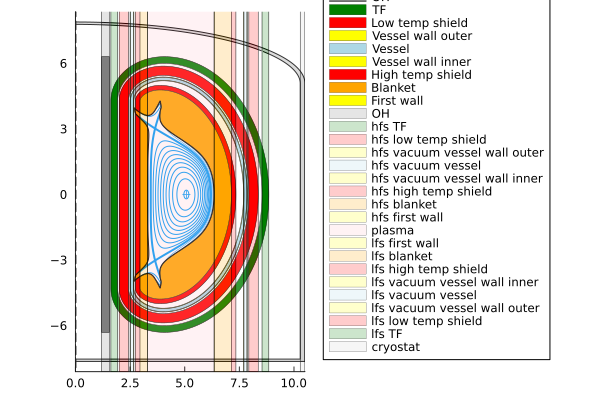

In [61]:
#actor=FUSE.ActorPlasmaFacingSurfaces(dd, act);
plot(dd.equilibrium;cx=true)
plot!(dd.build)
plot!(dd.build; cx=false)

[ Info: FUSE.ActorPlasmaFacingSurfaces @ step


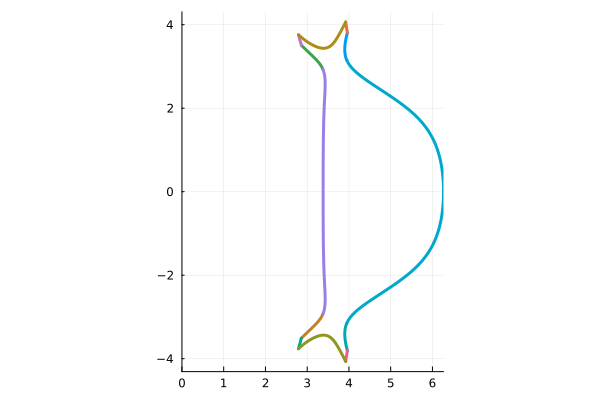

┌ Warning: /Users/meneghini/.julia/dev/FUSE/src/actors/actor_SOL is not an existing directory, Revise is not watching
└ @ Revise /Users/meneghini/.julia/packages/Revise/P8ITN/src/packagedef.jl:570
┌ Warning: /Users/meneghini/.julia/packages/SpecialPolynomials/FntdJ/src is not an existing directory, Revise is not watching
└ @ Revise /Users/meneghini/.julia/packages/Revise/P8ITN/src/packagedef.jl:570
┌ Warning: /Users/meneghini/.julia/packages/Plots/io9zQ/src is not an existing directory, Revise is not watching
└ @ Revise /Users/meneghini/.julia/packages/Revise/P8ITN/src/packagedef.jl:570


In [65]:
actor=FUSE.ActorPlasmaFacingSurfaces(dd,act)
plot(dd.wall.description_2d)

In [18]:
ini, act = FUSE.case_parameters(:FPP; version=:v1_demount, init_from=:scalars)

# Load TRANSP data at 2.91 s
file_0 = joinpath(dirname(dirname(@__DIR__)), "QED", "sample", "ods_163303Z29-2910.json")
dd = IMAS.json2imas(file_0; verbose=false)
dd.global_time = dd.equilibrium.time[end]

println(dd.global_time)
#    IMAS.flux_surfaces(dd.equilibrium.time_slice[])
# initialize actor
actor = FUSE.ActorQEDcurrent(dd,act.ActorQEDcurrent)
# evolve current
for k in 1:3
    FUSE.step(actor, 0.1, 100, resume=true)
    FUSE.finalize(actor)
    dd.global_time = dd.equilibrium.time[end]
end
println(dd.global_time)

2.9100000858306885
6.120000171661378


[ Info: FUSE.ActorQEDcurrent @ step
[ Info: FUSE.ActorQEDcurrent @ step
[ Info: FUSE.ActorQEDcurrent @ step


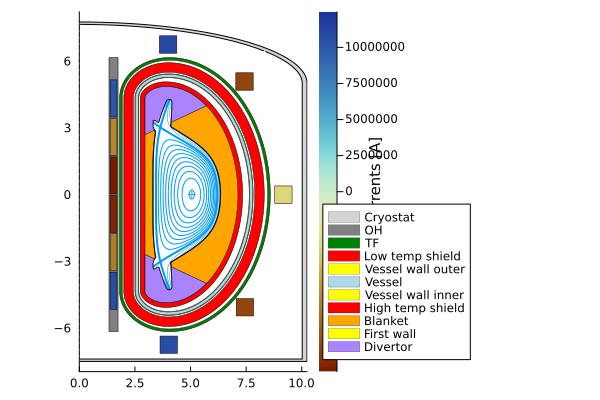

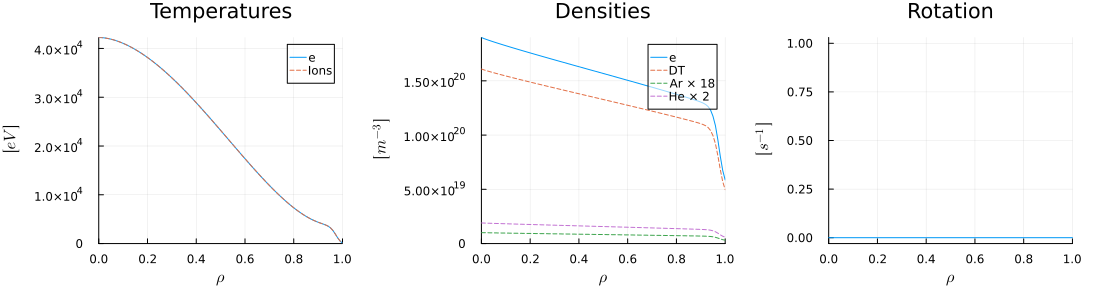

balance_of_plant
├─ Q_plant ➡ [3.4054]
├─ power_electric_net ➡ [4.34309e+08] [W]
├─ power_electric_plant_operation
│  ├─ system
│  │  ├─ 1
│  │  │  ├─ index ➡ 1
│  │  │  ├─ name ➡ "H&CD"
│  │  │  ├─ power ➡ [5.55556e+07] [W]
│  │  │  └─ subsystem
│  │  │     └─ 1
│  │  │        ├─ index ➡ 1
│  │  │        ├─ name ➡ "ec_launchers"
│  │  │        └─ power ➡ [5.55556e+07] [W]
│  │  ├─ 2
│  │  │  ├─ index ➡ 2
│  │  │  ├─ name ➡ "cryostat"
│  │  │  └─ power ➡ [3e+07] [W]
│  │  ├─ 3
│  │  │  ├─ index ➡ 3
│  │  │  ├─ name ➡ "tritium_handling"
│  │  │  └─ power ➡ [1.5e+07] [W]
│  │  ├─ 4
│  │  │  ├─ index ➡ 4
│  │  │  ├─ name ➡ "pumping"
│  │  │  └─ power ➡ [8e+07] [W]
│  │  └─ 5
│  │     ├─ index ➡ 5
│  │     ├─ name ➡ "pf_active"
│  │     └─ power ➡ [0] [W]
│  └─ total_power ➡ [1.80556e+08] [W]
├─ thermal_cycle
│  ├─ power_electric_generated ➡ [6.14865e+08]
│  ├─ power_thermal_convertable_total ➡ [1.53716e+09] [W]
│  ├─ system
│  │  ├─ 1
│  │  │  ├─ index ➡ 1
│  │  │  ├─ name ➡ "blanket"
│  

costing
├─ cost_decommissioning
│  ├─ cost ➡ 110.4 [$M]
│  └─ system
│     └─ 1
│        ├─ cost ➡ 110.4 [$M]
│        └─ name ➡ "decommissioning"
├─ cost_direct_capital
│  ├─ cost ➡ 3029.15 [$M]
│  └─ system
│     ├─ 1
│     │  ├─ cost ➡ 1757.58 [$M]
│     │  ├─ name ➡ "tokamak"
│     │  └─ subsystem
│     │     ├─ 1
│     │     │  ├─ cost ➡ 688.219 [$M]
│     │     │  └─ name ➡ "TF"
│     │     ├─ 2
│     │     │  ├─ cost ➡ 408.599 [$M]
│     │     │  └─ name ➡ "blanket"
│     │     ├─ 3
│     │     │  ├─ cost ➡ 258.329 [$M]
│     │     │  └─ name ➡ "OH"
│     │     ├─ 4
│     │     │  ├─ cost ➡ 108.165 [$M]
│     │     │  └─ name ➡ "low temp shield"
│     │     ├─ 5
│     │     │  ├─ cost ➡ 93.0043 [$M]
│     │     │  └─ name ➡ "cryostat"
│     │     ├─ 6
│     │     │  ├─ cost ➡ 60 [$M]
│     │     │  └─ name ➡ "ec"
│     │     ├─ 7
│     │     │  ├─ cost ➡ 43.5189 [$M]
│     │     │  └─ name ➡ "high temp shield"
│     │     ├─ 8
│     │     │  ├─ cost ➡ 43.2927 [$M]
│     │     │ 

In [17]:
plot(dd.equilibrium,cx=true)
plot!(dd.build)
display(plot!(dd.pf_active))
display(plot(dd.core_profiles))
display(dd.balance_of_plant)
display(dd.costing)

In [4]:
ini, act = FUSE.case_parameters(:FPP; version=:v1_demount, init_from=:scalars)
#act.ActorEquilibrium.model = :CHEASE # initialize with CHEASE
act.ActorEquilibrium.symmetrize = true
dd = FUSE.init(ini,act);

[ Info: FUSE.ActorEquilibrium @ step
[ Info: FUSE.ActorSolovev @ step
[ Info: FUSE.ActorCXbuild @ step
[ Info: FUSE.ActorSteadyStateCurrent @ step
[ Info: FUSE.ActorECsimple @ step


In [11]:
act.ActorPlasmaLimits.greenwald_fraction=0.1
act.ActorPlasmaLimits.min_q95=10.0
act.ActorPlasmaLimits.vertical_stability
FUSE.ActorPlasmaLimits(dd,act);

[ Info: FUSE.ActorPlasmaLimits @ step


LoadError: Exceeded limits:
* q95 of 3.6159674455831903 < limit of 10.0
* Greenwald fraction of 0.8996498280707907 > limit of 0.1

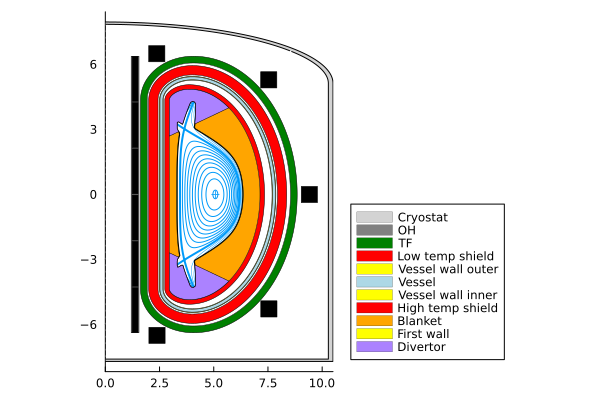

In [17]:
plot(dd.equilibrium,cx=true)
plot!(dd.build)
plot!(dd.pf_active)

[ Info: FUSE.ActorEquilibrium @ step
[ Info: FUSE.ActorSolovev @ step
[ Info: FUSE.ActorCXbuild @ step
[ Info: FUSE.ActorSteadyStateCurrent @ step
[ Info: FUSE.ActorNBIsimple @ step
[ Info: FUSE.ActorECsimple @ step
[ Info: FUSE.ActorICsimple @ step


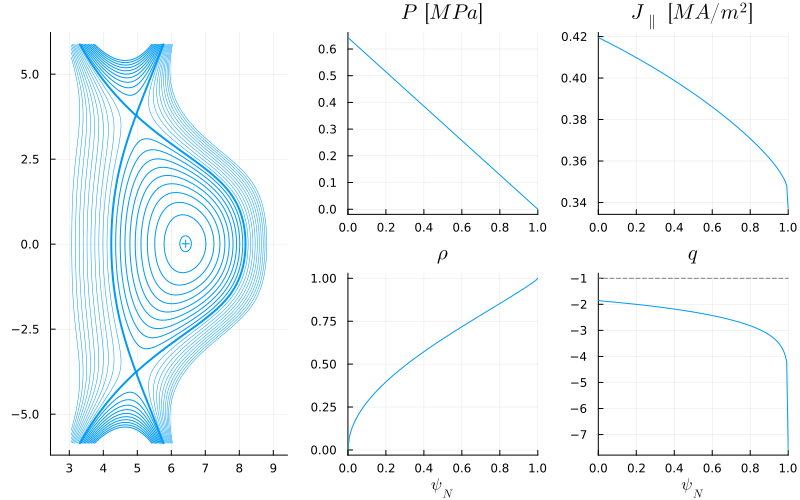

In [15]:
ini, act = FUSE.case_parameters(:ITER; init_from=:scalars)
act.ActorEquilibrium.symmetrize = true
dd = FUSE.init(ini,act);
#contour(IMAS.symmetrize_equilibrium!(dd.equilibrium.time_slice[]))
plot(dd.equilibrium.time_slice[])

In [ ]:
ini, act = FUSE.case_parameters(:FPP; version=:v1_demount, init_from=:scalars)

act.ActorEquilibrium.model = :CHEASE # initialize with CHEASE
act.ActorCHEASE.free_boundary = true

dd=IMAS.dd()
plot()
dd = FUSE.init_equilibrium(dd,ini,act);
plot(dd.equilibrium,cx=true)

In [30]:
#ini,act = FUSE.case_parameters(:ITER; init_from=:ods);
#ini,act = FUSE.case_parameters(:ITER; init_from=:scalars);
#ini,act = FUSE.case_parameters(:D3D);
@time ini, act = FUSE.case_parameters(:FPP; version=:v1_demount, init_from=:scalars);
#@time ini, act = FUSE.case_parameters(:FPP; version=:v1_demount, init_from=:ods);
#ini,act = FUSE.case_parameters(:FPP; version=:v1, init_from=:scalars);
#ini,act = FUSE.case_parameters(:CAT);
#ini,act = FUSE.case_parameters(:HDB5; tokamak=:JET, case=500);

# Modify default settings
#ini.core_profiles.zeff = 2.0
#ini.equilibrium.ζ = 0.1
#act.ActorTauenn.transport_model = :ds03
#act.ActorEquilibrium.model = :CHEASE;

  0.001920 seconds (11.02 k allocations: 667.750 KiB)


[ Info: FUSE.ActorEquilibrium @ step
[ Info: FUSE.ActorSolovev @ step


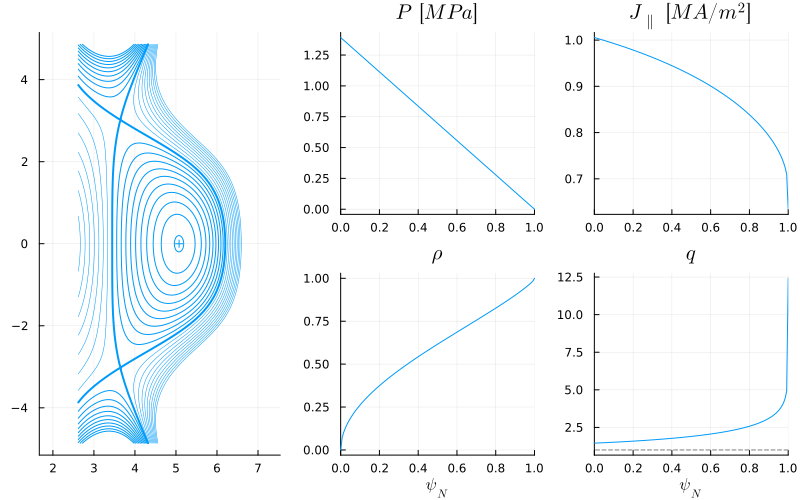

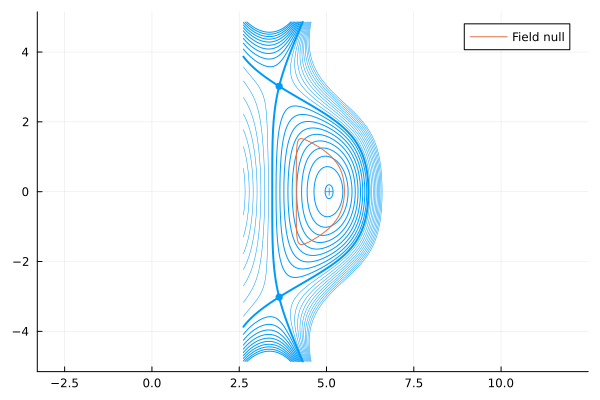

[ Info: FUSE.ActorCXbuild @ step


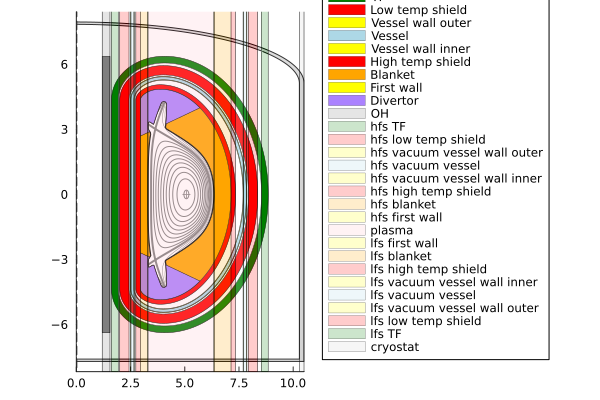

28×9 DataFrame
 Row │ group   details               type      ΔR         R_start   R_end     material      area       volume     
     │ String  String                String    Float64    Float64   Float64   String        Float64    Float64    
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.19256     0.0       1.19256                15.206       56.97
   2 │ in                            oh        0.359292    1.19256   1.55185  ReBCO          4.58125     39.4987
   3 │ in                                      0.0696459   1.55185   1.6215                  0.888038     8.85319
   4 │ hfs                           tf        0.310717    1.6215    1.93222  ReBCO         10.0629     102.523
   5 │ hfs                                     0.0696459   1.93222   2.00186                 3.7816     134.961
   6 │ hfs     low temp              shield    0.428655    2.00186   2.43052  

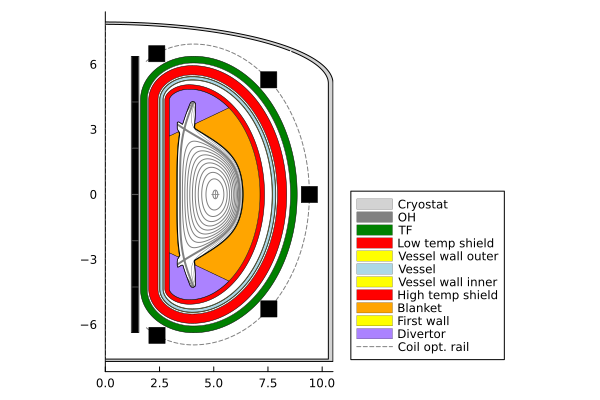

[ Info: FUSE.ActorSteadyStateCurrent @ step


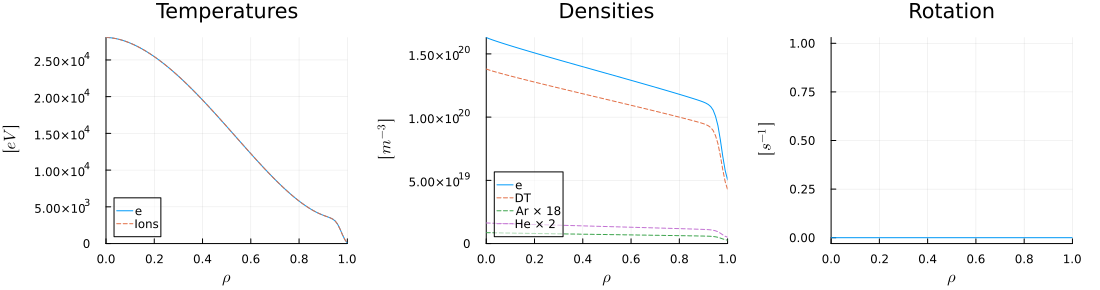

[ Info: FUSE.ActorECsimple @ step


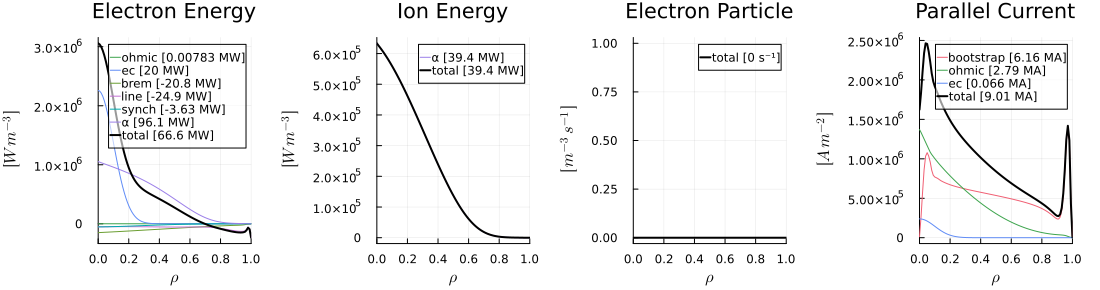

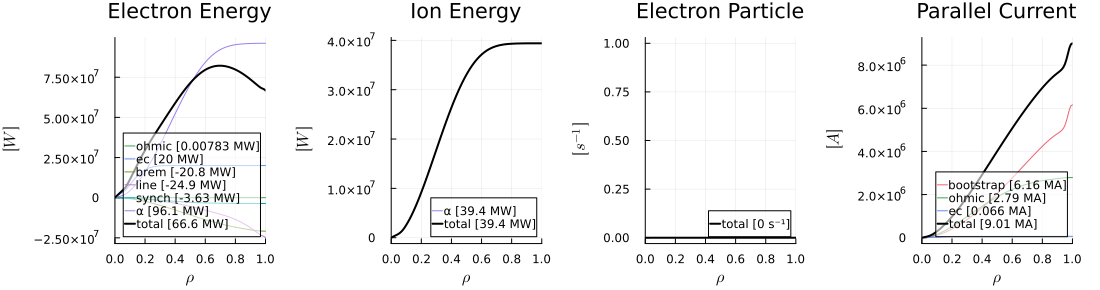

 12.138105 seconds (50.77 M allocations: 17.784 GiB, 12.28% gc time, 3.68% compilation time: 93% of which was recompilation)


In [34]:
# initialize data structure
#ini.equilibrium.R0=10#4.824432302041749*1.5
#ini.equilibrium.ϵ=0.2857142857142857*1.5
@time dd = FUSE.init(ini, act; do_plot=true);
#plot(dd.equilibrium,cx=true)

In [ ]:
ini

In [ ]:
FUSE.ActorEquilibrium(dd, act);
plot!(dd.equilibrium,cx=true)
#plot!(dd.build)

In [ ]:
dd_copy = deepcopy(dd);

In [ ]:
dd = deepcopy(dd_copy)
pr=dd.equilibrium.time_slice[].boundary.outline.r
pz=dd.equilibrium.time_slice[].boundary.outline.z
pr,pz = IMAS.resample_2d_line(pr, pz; n_points=101)
pr,pz = IMAS.reorder_flux_surface!(pr, pz)
plot(pr,pz;aspect_ratio=:equal)
mxh = IMAS.MXH(pr[1:n:end], pz[1:n:end], 5)
display(plot!(mxh))
mxh
#dd.equilibrium.time_slice[].boundary.squareness=0.15
FUSE.ActorEquilibrium(dd, act);
plot(dd.equilibrium;cx=true)
display(plot!(mxh))
# @show dd.equilibrium.time_slice[].global_quantities.ip
# IMAS.freeze(dd.equilibrium)
#pr=dd.equilibrium.time_slice[].boundary.outline.r
#pz=dd.equilibrium.time_slice[].boundary.outline.z
#plot!(pr,pz;aspect_ratio=:equal)
#plot!(dd.equilibrium.time_slice[].profiles_2d)
#mxh = IMAS.MXH(pr, pz, 5)
#display(plot!(mxh))
#print(mxh)

In [ ]:
import MXHEquilibrium
B0 = 4.7
plasma_shape = MXHEquilibrium.MillerExtendedHarmonicShape(4.824, 0.0, 0.286, 2.193, 0.001, [0.002, 0.002],  [0.722, 0.096])
alpha=0.0
qstar=1.5
MXHEquilibrium.solovev(B0, plasma_shape, alpha, qstar; B0_dir=1, Ip_dir=1, x_point=(3.844799668551105, -3.0264078613615606))#, symmetric=true)

In [4]:
#act.ActorTauenn.do_plot = true
FUSE.ActorWholeFacility(dd, act);

[ Info: FUSE.ActorWholeFacility @ step
[ Info: FUSE.ActorEquilibriumTransport @ step
[ Info: FUSE.ActorSteadyStateCurrent @ step
[ Info: FUSE.ActorTauenn @ step
[ Info: FUSE.ActorSteadyStateCurrent @ step
[ Info: FUSE.ActorEquilibrium @ step
[ Info: FUSE.ActorSolovev @ step
[ Info: FUSE.ActorPlasmaLimits @ step
[ Info: FUSE.ActorHFSsizing @ step
[ Info: FUSE.ActorFluxSwing @ step
[ Info: FUSE.ActorStresses @ step
[ Info: FUSE.ActorLFSsizing @ step
[ Info: FUSE.ActorCXbuild @ step
[ Info: FUSE.ActorPFcoilsOpt @ step
[ Info: FUSE.ActorPassiveStructures @ step
[ Info: FUSE.ActorNeutronics{Float64} @ step
[ Info: FUSE.ActorBlanket @ step
[ Info: FUSE.ActorCXbuild @ step
[ Info: FUSE.ActorDivertors @ step
[ Info: FUSE.ActorBalanceOfPlant @ step
[ Info: FUSE.ActorCosting @ step


In [ ]:
IMAS.freeze(dd.summary)

function digest2(ids::Union{IMAS.IDS,IMAS.IDSvector})
    out=digest2!(Dict{String,String}(),ids)
    while !isempty(out)
        
    end
end

function digest2!(out::Dict{String,String},ids::Union{IMAS.IDS,IMAS.IDSvector})
    for field in keys(ids)
        if typeof(ids)<:IMAS.IDS
            value=getproperty(ids,field)
        elseif typeof(ids)<:IMAS.IDSvector
            value=ids[field]
        end
        if field == :source
            continue
        elseif typeof(value) <: Union{IMAS.IDS,IMAS.IDSvector}
            digest2!(out, value)
        else
            if field == :value
                fname = string(IMAS.f2i(ids))
            else
                fname = string(IMAS.f2i(ids)) * ".$field"
            end
            out[fname] = fname
        end
    end
    return out
end

dd.summary.line_average.n_e.value=Float64[0.0]
digest2(dd.summary)
#typeof(IMAS.dd()).parameters[1]

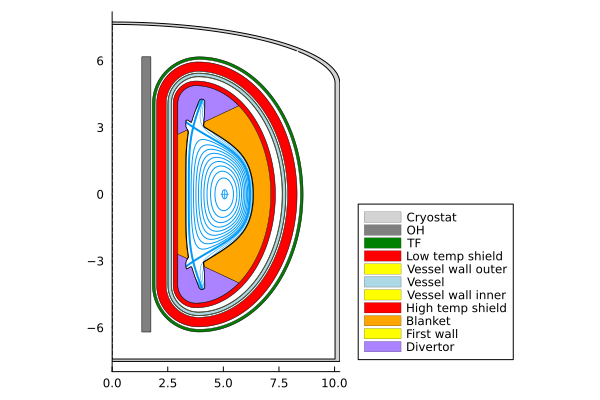

In [15]:

plot(dd.equilibrium,cx=true)
plot!(dd.build)

In [ ]:
IMAS.freeze(dd.costing)

In [ ]:
dd = deepcopy(dd_copy)
FUSE.ActorEquilibriumTransport(dd, act; do_plot=true);

In [ ]:
@time FUSE.ActorHFSsizing(dd, act; do_plot=true);
display(plot(dd.solid_mechanics.center_stack.stress))
dd.build.oh

In [ ]:
@time FUSE.ActorLFSsizing(dd, act; do_plot=true);
display(dd.build.tf)

In [ ]:
@time FUSE.ActorCXbuild(dd, act; do_plot=true);

In [ ]:
dd_copy = deepcopy(dd);

In [ ]:
dd = deepcopy(dd_copy)
ini.pf_active.n_pf_coils_outside = 5
FUSE.init_pf_active(dd, ini, act)
# λ_currents: make bigger to force currents to fit within the current limits
# update_equilibrium: overwrite the target equilibrium with what the coils can actually generate
@time FUSE.ActorPFcoilsOpt(dd, act; weight_lcfs=1, weight_null=1E-3, weight_currents=1.0, weight_strike=1.0, do_plot=true, update_equilibrium=true);

In [ ]:
@time FUSE.ActorCXbuild(dd, act, rebuild_wall=true);
@time FUSE.ActorPFcoilsOpt(dd, act; weight_lcfs=1, weight_null=1E-3, weight_currents=1.0, weight_strike=1.0, do_plot=true, update_equilibrium=false);

In [ ]:
@time FUSE.ActorNeutronics(dd, act; do_plot=true);

In [ ]:
@time FUSE.ActorBlanket(dd, act)#; do_plot=true);
dd.blanket

In [ ]:
@time FUSE.ActorDivertors(dd, act)#; do_plot=true);
dd.divertors

In [ ]:
@time FUSE.ActorBalanceOfPlant(dd, act)#; do_plot=true);
IMAS.freeze(dd.balance_of_plant)

In [ ]:
@time FUSE.ActorCosting(dd, act)#; do_plot=true);
IMAS.freeze(dd.costing)

In [ ]:
# Save `dd` to Json, so we can share our results with others
IMAS.imas2json(dd, "fpp_v1_FUSE.json")

In [ ]:
plot(dd.equilibrium; cx=true)
plot!(dd.build; legend=false)
display(plot!(dd.pf_active))

display(dd.build.layer)

display(plot(dd.equilibrium))

display(plot(dd.core_profiles))

display(plot(dd.core_sources))

display(IMAS.freeze(dd.balance_of_plant))

display(IMAS.freeze(dd.costing))

In [ ]:
ini_fpp_s,act_fpp_s = FUSE.case_parameters(:FPP,version=:v1_demount;init_from=:scalars);
#act_fpp_s.ActorEquilibrium.model=:CHEASE
dd_fpp_s = FUSE.init(ini_fpp_s,act_fpp_s);

ini_fpp_o,act_fpp_o = FUSE.case_parameters(:FPP,version=:v1_demount;init_from=:ods);

dd_fpp_o = FUSE.init(ini_fpp_o,act_fpp_o);

In [ ]:
act_fpp_s.ActorEquilibriumTransport.iterations=10
act_fpp_s.ActorEquilibriumTransport.do_plot=true


FUSE.ActorEquilibriumTransport(dd_fpp_s,act_fpp_s);

In [ ]:
act_fpp_o.ActorEquilibriumTransport.iterations=10
act_fpp_o.ActorEquilibriumTransport.do_plot=true

FUSE.ActorEquilibriumTransport(dd_fpp_o,act_fpp_o);

In [ ]:
ini_fpp_s,act_fpp_s = FUSE.case_parameters(:FPP,version=:v1_demount;init_from=:scalars);
act_fpp_s.ActorEquilibrium.model=:CHEASE
act_fpp_s.ActorCHEASE.rescale_eq_to_ip = true
act_fpp_s.ActorCHEASE.free_boundary = false
@show ini_fpp_s.equilibrium.ip/1e6
dd_fpp_s = FUSE.init(ini_fpp_s,act_fpp_s);

ini_fpp_o,act_fpp_o = FUSE.case_parameters(:FPP,version=:v1_demount;init_from=:ods);

dd_fpp_o = FUSE.init(ini_fpp_o,act_fpp_o);

In [ ]:
@show dd_fpp_o.equilibrium.time_slice[].global_quantities.ip
FUSE.ActorSteadyStateCurrent(dd_fpp_o,act_fpp_o)
@show dd_fpp_o.equilibrium.time_slice[].global_quantities.ip

In [ ]:
act_fpp_s.ActorEquilibriumTransport.iterations=5
act_fpp_s.ActorEquilibriumTransport.do_plot=true


FUSE.ActorEquilibriumTransport(dd_fpp_s,act_fpp_s);